In [257]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [258]:
sns.set_theme(style='ticks', font='Times New Roman', font_scale=1.2)

[95.49649317 89.73217973 95.86272149 77.28019218 96.31294964 73.31205708
 96.15740351 85.04518115 94.96339678 80.3824432  94.71967134 56.06969596
 95.86676926 79.44813036 96.55668733 80.56454019 96.70926518 78.62185422
 96.77326832 89.35784311 95.97329439 73.26865748 95.84084761 86.18209171
 95.57995882 83.3301012  94.37738247 70.09198996 92.22462203 79.4842582
 89.58440226 75.66005597 90.66974596 67.81560404 90.5420354  78.10997363
 92.97441772 80.69585435 91.06060606 80.08204339]


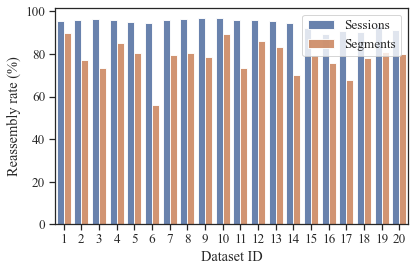

In [259]:
def draw_reassembly_rate(fname):
    y_values = np.loadtxt(fname)
    columns = ['Sessions', 'Segments'] * 20
    print(np.ravel(y_values))
    data = {
        'x_range': np.array([x for x in range(1, 21) for _ in range(2)]),
        'y_values': np.ravel(y_values),
        'columns':  columns
    }
    ax = sns.barplot(data=data, x='x_range', y='y_values', hue='columns', alpha=0.9)
    ax.set_xlabel('Dataset ID')
    ax.set_ylabel('Reassembly rate (%)')
    plt.tight_layout()
    plt.savefig('png/reassembly_rate.png', format='png', bbox_inches='tight', dpi=300)
draw_reassembly_rate('reassembly_rate.txt')

C:\Users\NirvanaS\AppData\Local\Temp/ipykernel_17876/3565330370.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(xticks, rotation=45)


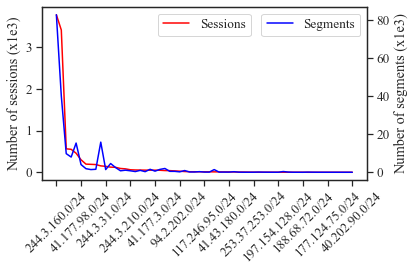

In [260]:
import matplotlib.ticker as ticker
def draw_session_dist(fname):
    xticks = []
    sessions = []
    segments = []
    with open(fname, 'r') as fp:
        while True:
            line = fp.readline()
            if not line: break 
            addr, num_session, num_segment = line.split()
            xticks.append(addr)
            sessions.append(int(num_session)/1e3)
            segments.append(int(num_segment)/1e3)
    fig, ax1 = plt.subplots()
    sns.lineplot(x=xticks, y=sessions, ax=ax1, color='red', label='Sessions')
    ax2 = ax1.twinx()
    sns.lineplot(x=xticks, y=segments, ax=ax2, color='blue', label='Segments')
    ax1.set_ylabel('Number of sessions (x1e3)')
    ax2.set_ylabel('Number of segments (x1e3)')
    ax1.xaxis.set_major_locator(ticker.MultipleLocator(base=5))
    ax1.set_xticklabels(xticks, rotation=45)
    ax1.legend(loc='upper center')
    ax2.legend(loc='upper right')
    plt.tight_layout()
    plt.savefig('png/session_dist.png', format='png', bbox_inches='tight', dpi=300)
    
draw_session_dist('session_dist.txt')

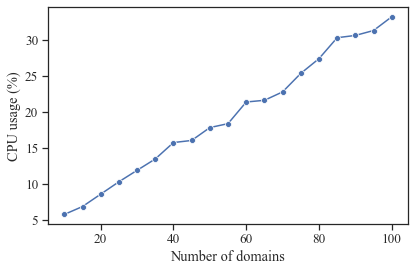

In [261]:
def draw_cpu_usage(fname):
    data = np.loadtxt(fname)
    df = pd.DataFrame(data=data[:,-1], index=data[:,0])
    ax = sns.lineplot(data=df, marker='o')
    ax.set_xlabel('Number of domains')
    ax.set_ylabel('CPU usage (%)')
    plt.legend().remove()
    plt.tight_layout()
    plt.savefig('png/cpu_usage.png', format='png', bbox_inches='tight', dpi=300)
draw_cpu_usage('cpu_usage.txt')

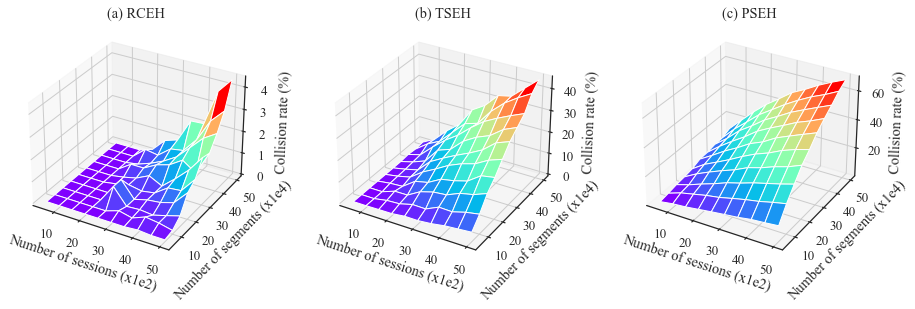

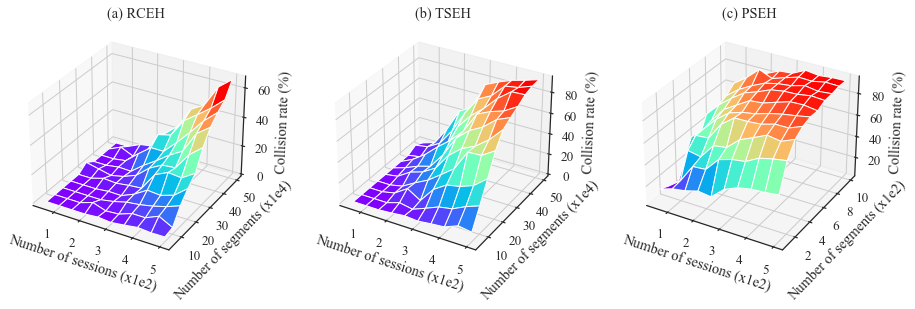

In [262]:
from mpl_toolkits.mplot3d import Axes3D

def draw_collision_rate(fname, title):
    file_data = np.loadtxt(fname)
    x = file_data[0, 1:] / 1e2
    y = file_data[1:, 0] / 1e4
    z = file_data[1:, 1:] * 100
    X, Y = np.meshgrid(x, y)
    fig = plt.figure(figsize=(8,5))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, z, cmap='rainbow')
    
    ax.set_title(title)
    ax.set_xlabel('Number of sessions (x1e2)')
    ax.set_ylabel('Number of segments (x1e4)')
    ax.set_zlabel('Collision rate (%)')
    plt.show()
#draw_collision_rate('RCEH_SEQ.txt', 'RCEH') 

def draw_collision_rates(flist, titles, save_name):
    fig = plt.figure(figsize=(13, 4))
    columns = len(titles)
    for i, fname in enumerate(flist):
        file_data = np.loadtxt(fname)
        x = file_data[0, 1:] 
        y = file_data[1:, 0]
        if any(y > 1e4):
            x = x / 1e2
            y = y / 1e4
            y_title = 'Number of segments (x1e4)'
        else:
            x = x / 1e2
            y = y / 1e2
            y_title = 'Number of segments (x1e2)'
        z = file_data[1:, 1:] * 100
        X, Y = np.meshgrid(x, y)
        title = '({}) {}'.format(chr(ord('a')+i), titles[i])
        loc = '1{}{}'.format(columns, i+1)
        ax = fig.add_subplot(int(loc), projection='3d')
        ax.plot_surface(X, Y, z, cmap='rainbow')
        ax.set_title(title)
        ax.set_xlabel('Number of sessions (x1e2)')
        ax.set_ylabel(y_title)
        ax.set_zlabel('Collision rate (%)')
    plt.tight_layout()
    plt.savefig(save_name, format='png', bbox_inches='tight', dpi=300, transparent=True)
    
flist_seq = [
    'RCEH_SEQ.txt',
    'TSEH_SEQ.txt',
    'PSEH_SEQ.txt'
]

flist_id = [
    'RCEH_ID.txt',
    'TSEH_ID.txt',
    'PSEH_ID.txt'
]

titles = ['RCEH', 'TSEH', 'PSEH']

draw_collision_rates(flist_seq, titles, 'png/seq_collision_rate.png')
draw_collision_rates(flist_id, titles, 'png/id_collision_rate.png')

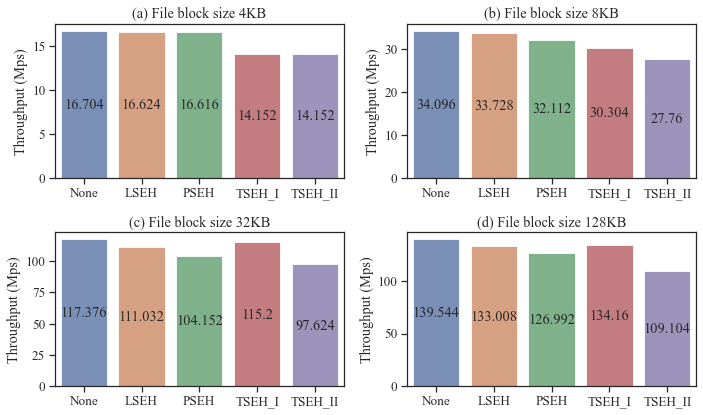

In [267]:
def draw_throughput(fname):
    file_data = np.loadtxt(fname)
    # block size
    xlabel = ['4KB', '8KB', '32KB', '128KB']
    columns = ['None', 'LSEH', 'PSEH', 'TSEH_I', 'TSEH_II']
    f, axes = plt.subplots(2, len(xlabel)//2, figsize=(10,6))
    for i, data in enumerate(file_data):
        data = data * 8 / 1e3
        data = data.reshape(-1, 1)
        df = pd.DataFrame(data=data.T, columns=columns)
        ax = sns.barplot(data=df, ax=axes[i//2, i%2], alpha=0.8)
        ax.set_title('({}) File block size {}'.format(chr(ord('a')+i), xlabel[i]))
        ax.set_ylabel('Throughput (Mps)')
        for i, container in enumerate(ax.containers):
            ax.bar_label(container, data[i], label_type='center')
    f.tight_layout()
    f.savefig('png/throughput.png', format='png', bbox_inches='tight', dpi=300, transparent=True)

draw_throughput('throughput.txt')

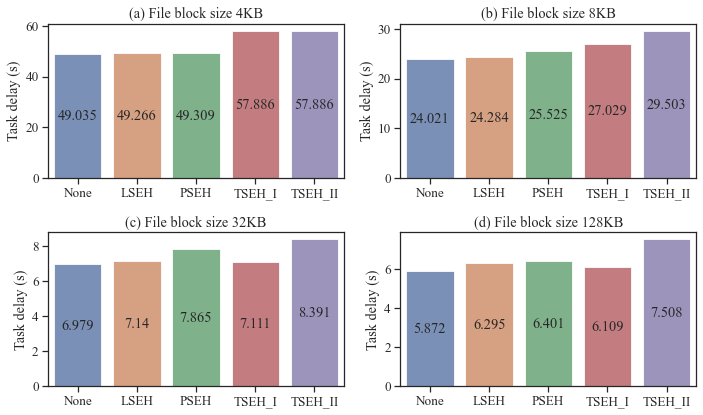

In [266]:
def draw_taskdelay(fname):
    file_data = np.loadtxt(fname)
    # block size
    xlabel = ['4KB', '8KB', '32KB', '128KB']
    columns = ['None', 'LSEH', 'PSEH', 'TSEH_I', 'TSEH_II']
    f, axes = plt.subplots(2, len(xlabel)//2, figsize=(10,6))
    for i, data in enumerate(file_data):
        data = data / 1e3
        data = data.reshape(-1, 1)
        df = pd.DataFrame(data=data.T, columns=columns)
        ax = sns.barplot(data=df, ax=axes[i//2, i%2], alpha=0.8)
        ax.set_title('({}) File block size {}'.format(chr(ord('a')+i), xlabel[i]))
        ax.set_ylabel('Task delay (s)')
        for i, container in enumerate(ax.containers):
            ax.bar_label(container, data[i], label_type='center')
    f.tight_layout()
    f.savefig('png/taskdelay.png', format='png', bbox_inches='tight', dpi=300, transparent=True)

draw_taskdelay('delay.txt')